In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df_Train=pd.read_csv('Train_New.csv')
df_Test=pd.read_csv('Test_New.csv')

In [3]:
df_Train.head()

,Package Name,Package Type,D1,D2,D3,D4,D5,N1,N2,N3,...,SP12,SP13,SP14,SP15,SP16,SP17,SP18,SP19,Cancellation Rules,Per Person Price
0,422,4,79,118,54,9,30,1,2,2,...,166,136,108,93,65,46,27,18,5,11509.0
1,1152,3,107,95,90,49,30,1,2,1,...,166,136,108,93,65,46,27,18,0,22485.5
2,1437,2,113,24,69,49,30,2,1,0,...,166,136,108,93,65,46,27,18,0,12421.5
3,487,3,71,68,0,33,30,2,1,1,...,166,136,108,93,65,46,27,18,0,35967.0
4,196,3,86,13,69,49,30,4,3,0,...,166,136,108,93,65,46,27,18,0,25584.0


In [4]:
df_Test.head()

,Package Name,Package Type,D1,D2,D3,D4,D5,N1,N2,N3,...,SP11,SP12,SP13,SP14,SP15,SP16,SP17,SP18,SP19,Cancellation Rules
0,841,2,35,94,69,49,30,5,0,0,...,194,166,136,108,93,65,46,27,18,0
1,1061,2,10,94,69,49,30,2,0,0,...,194,166,136,108,93,65,46,27,18,9
2,2127,4,71,94,69,49,30,3,0,0,...,194,166,136,108,93,65,46,27,18,9
3,1471,1,71,94,69,49,30,3,0,0,...,194,166,136,108,93,65,46,27,18,9
4,1938,2,21,83,92,1,30,1,2,1,...,194,166,136,108,93,65,46,27,18,0


In [5]:
print(df_Train.shape)
print(df_Test.shape)

(21000, 49)
(9000, 48)


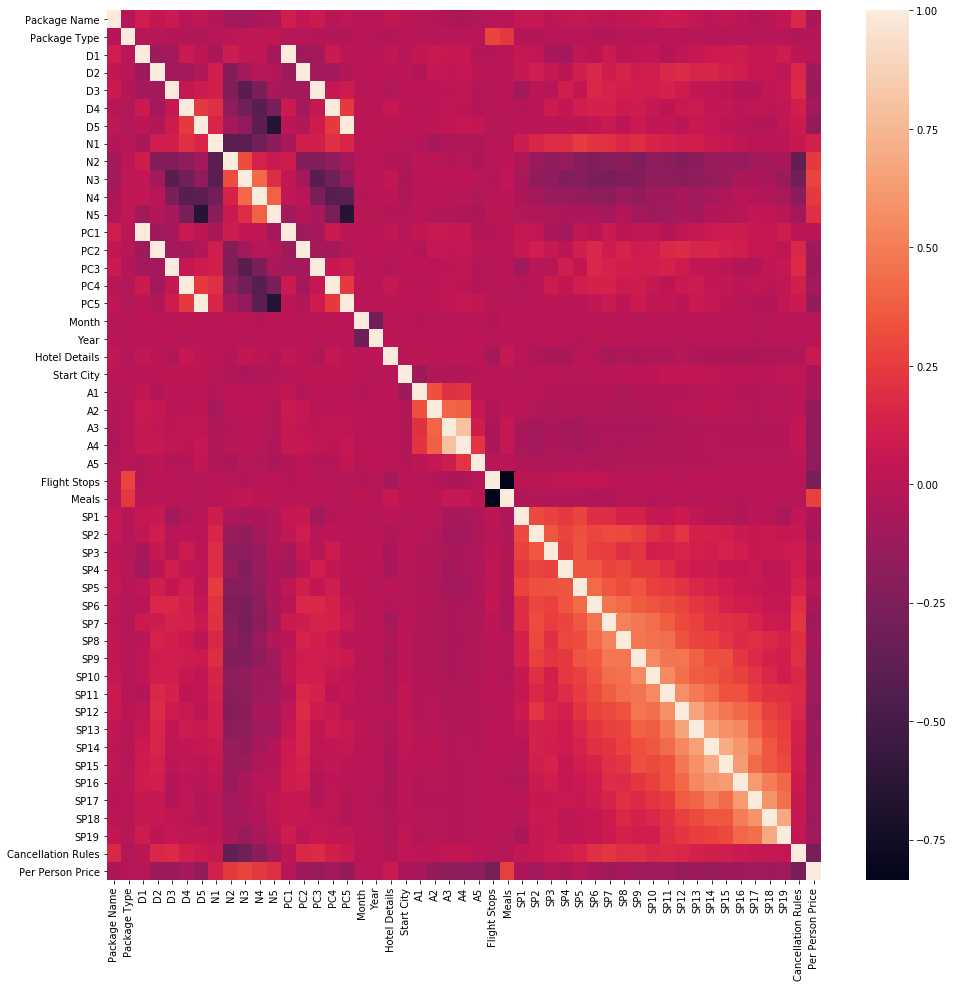

In [6]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_Train.corr())

In [7]:
df_Train.shape

(21000, 49)

In [8]:
X=df_Train.drop(['Per Person Price'],axis=1)
y=df_Train[['Per Person Price']]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.18,random_state=33)

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [11]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SelectKBest(k='all', score_func=<function f_regression at 0x0000027175011438>)

In [12]:
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)

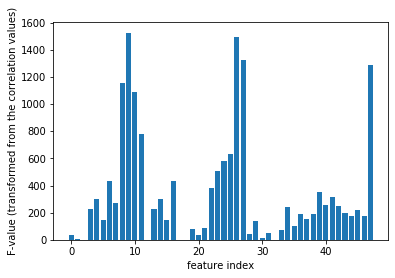

In [13]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [14]:
f_selector.scores_

array([3.85864012e+01, 6.29445908e+00, 4.71444821e-03, 2.25578477e+02,
       3.04151292e+02, 1.48338210e+02, 4.36521098e+02, 2.70194596e+02,
       1.15686007e+03, 1.52652903e+03, 1.09059079e+03, 7.80689959e+02,
       4.71444821e-03, 2.25578477e+02, 3.04151292e+02, 1.48338210e+02,
       4.36521098e+02, 3.92648865e-01, 2.85636967e-01, 8.31824260e+01,
       3.81755999e+01, 8.66527387e+01, 3.81205925e+02, 5.10123305e+02,
       5.80410926e+02, 6.36073740e+02, 1.49651124e+03, 1.32850743e+03,
       4.51769611e+01, 1.41366079e+02, 1.40220279e+01, 4.74910022e+01,
       1.79268430e+00, 7.14427044e+01, 2.41899657e+02, 1.01480411e+02,
       1.88200662e+02, 1.55999615e+02, 1.93837451e+02, 3.49649157e+02,
       2.58834120e+02, 3.16948102e+02, 2.52359284e+02, 1.97362204e+02,
       1.78027918e+02, 2.16346502e+02, 1.72438245e+02, 1.28992968e+03])

In [15]:
score = f_selector.scores_

In [16]:
Best_Features = pd.DataFrame({'Feature_Score': score})

In [17]:
Best_Features.head(5)

,Feature_Score
0,38.586401
1,6.294459
2,0.004714
3,225.578477
4,304.151292


In [18]:
Names = df_Train.columns
Names

Index(['Package Name', 'Package Type', 'D1', 'D2', 'D3', 'D4', 'D5', 'N1',
       'N2', 'N3', 'N4', 'N5', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Month',
       'Year', 'Hotel Details', 'Start City', 'A1', 'A2', 'A3', 'A4', 'A5',
       'Flight Stops', 'Meals', 'SP1', 'SP2', 'SP3', 'SP4', 'SP5', 'SP6',
       'SP7', 'SP8', 'SP9', 'SP10', 'SP11', 'SP12', 'SP13', 'SP14', 'SP15',
       'SP16', 'SP17', 'SP18', 'SP19', 'Cancellation Rules',
       'Per Person Price'],
      dtype='object')

In [19]:
Column_Name = pd.DataFrame({'Column_Name': Names})

In [22]:
Column_Name.head()

,Column_Name
0,Package Name
1,Package Type
2,D1
3,D2
4,D3


In [24]:
Merged = pd.concat([Column_Name, Best_Features], axis=1)
Merged.head()

,Column_Name,Feature_Score
0,Package Name,38.586401
1,Package Type,6.294459
2,D1,0.004714
3,D2,225.578477
4,D3,304.151292


In [29]:
Merged.sort_values(['Feature_Score'], ascending=False).head(50)

,Column_Name,Feature_Score
9,N3,1526.529026
26,Flight Stops,1496.511236
27,Meals,1328.507430
47,Cancellation Rules,1289.929677
8,N2,1156.860066
10,N4,1090.590795
11,N5,780.689959
25,A5,636.073740
24,A4,580.410926
23,A3,510.123305
